<a href="https://colab.research.google.com/github/sarthak-314/Book-Recommender-System/blob/master/Base%20Models/KMeans%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Means**

***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
DF_PATH = './Colab Notebooks/CADABRA/Recommender System/goodreads-10k'
books = pd.read_csv(os.path.join(DF_PATH, 'books.csv'))
books.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


Clusters on basis of two features = average_rating and ratings_count

In [ ]:
features = ['average_rating', 'ratings_count']
books.dropna(subset=features, inplace=True)
data = np.asarray([books[x].values for x in features]).T
print('Shape:', data.shape)
data

Shape: (9979, 2)


array([[4.340000e+00, 4.780653e+06],
       [4.440000e+00, 4.602479e+06],
       [3.570000e+00, 3.866839e+06],
       ...,
       [4.350000e+00, 9.421000e+03],
       [3.650000e+00, 1.127900e+04],
       [4.000000e+00, 9.162000e+03]])

In [ ]:
#Inertia is within cluster sum of squares
inertia = []
for n_clusters in range(1, 26):
    kmeans = KMeans(n_clusters)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

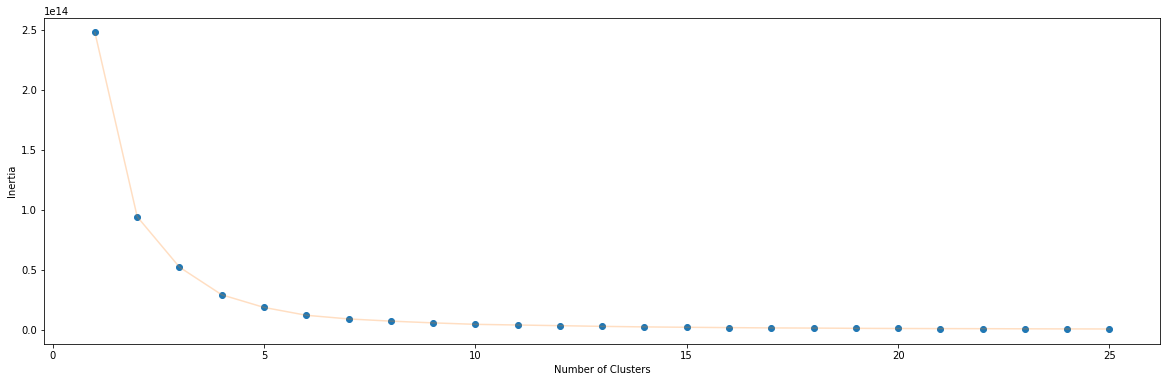

In [ ]:
plt.figure(figsize = (20, 6))
plt.plot(list(range(1, 26)), inertia , 'o')
plt.plot(list(range(1, 26)), inertia , '-' , alpha = 0.25)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

The elbow is a num_clusters = 2

In [ ]:
kmeans = KMeans(2)
predictions = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

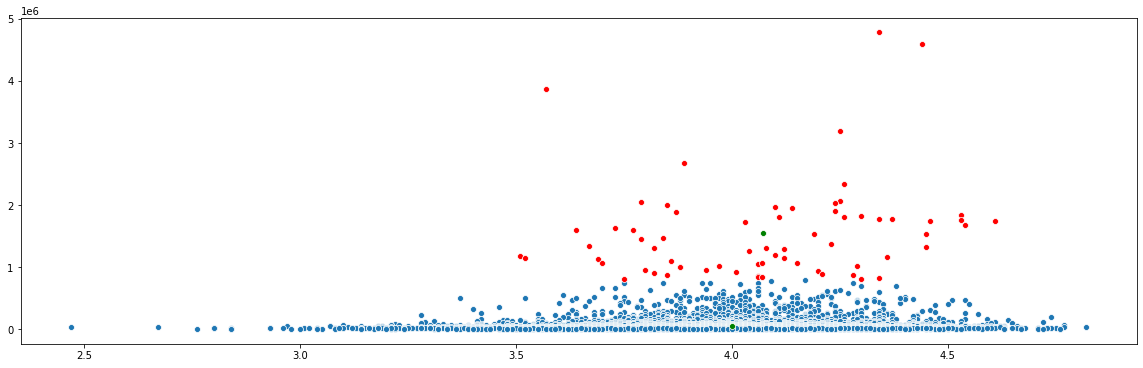

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 6))
X1 = [x[0] for i, x in enumerate(data) if predictions[i] == 0]
Y1 = [x[1] for i, x in enumerate(data) if predictions[i] == 0]
sns.scatterplot(X1, Y1)
X2 = [x[0] for i, x in enumerate(data) if predictions[i] == 1]
Y2 = [x[1] for i, x in enumerate(data) if predictions[i] == 1]
sns.scatterplot(X2, Y2, color='r')
_ = sns.scatterplot([x[0] for x in centers], [x[1] for x in centers], color='g')

The red and blue form 2 diffrent clusters. The green dot are the centers of the two clusters

### Recommending Books

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler
ratings = pd.read_csv(os.path.join(DF_PATH, 'ratings.csv'))

In [ ]:
features = ['average_rating', 'ratings_count', 'books_count', 'original_publication_year']
books_features = books[features]
scaler = RobustScaler()
books_features = scaler.fit_transform(books_features)

In [ ]:
def recommend_n_books(book_id, n):
    model = NearestNeighbors(n_neighbors=n)
    model.fit(books_features)
    distance, indices = model.kneighbors(books_features)
    return distance[book_id-1], indices[book_id-1]

In [ ]:
recommend_n_books(10, 10)

(array([ 0.        , 36.52996303, 38.97666759, 46.72078759, 47.70382737,
        48.50246546, 48.84438243, 53.48131253, 56.35629477, 56.82289195]),
 array([ 9, 42, 28, 62, 57, 70, 41,  4, 12,  6]))